# Setup

Clone GitHub [repository](https://github.com/ultralytics/yolov5), install [dependencies](https://github.com/ultralytics/yolov5/blob/master/requirements.txt) and check PyTorch and GPU.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


In [ ]:
!git clone https://github.com/ultralytics/yolov5  # Clone the YOLOv5 repository
%cd yolov5
!pip install -r requirements.txt  # Install the required packages


fatal: destination path 'yolov5' already exists and is not an empty directory.
/content/yolov5


Thêm file wb_localization_dataset.zip vào trước khi chạy hàm này

In [ ]:
!unzip /content/wb_localization_dataset.zip -d /content


Archive:  /content/wb_localization_dataset.zip
   creating: /content/wb_localization_dataset/
   creating: /content/wb_localization_dataset/images/
   creating: /content/wb_localization_dataset/images/train/
  inflating: /content/wb_localization_dataset/images/train/nlvnpf-0140-01-008.jpg  
  inflating: /content/wb_localization_dataset/images/train/nlvnpf-0137-01-008.jpg  
  inflating: /content/wb_localization_dataset/images/train/nlvnpf-0140-01-010.jpg  
  inflating: /content/wb_localization_dataset/images/train/nlvnpf-0137-01-013.jpg  
  inflating: /content/wb_localization_dataset/images/train/nlvnpf-0174-03-009.jpg  
  inflating: /content/wb_localization_dataset/images/train/nlvnpf-0137-01-034.jpg  
  inflating: /content/wb_localization_dataset/images/train/nlvnpf-0137-01-026.jpg  
  inflating: /content/wb_localization_dataset/images/train/nlvnpf-0140-01-007.jpg  
  inflating: /content/wb_localization_dataset/images/train/nlvnpf-0137-01-014.jpg  
  inflating: /content/wb_localizatio

In [ ]:
preprocess_code = """
import cv2
import os
import shutil

def apply_gaussian_blur(img, kernel_size=(3, 3), sigma=0.5):
    return cv2.GaussianBlur(img, kernel_size, sigma)

def apply_bilateral_filter(img, d=9, sigma_color=75, sigma_space=75):
    return cv2.bilateralFilter(img, d, sigma_color, sigma_space)

def adjust_brightness_contrast(img, brightness=20, contrast=20):
    if brightness != 0:
        shadow = brightness if brightness > 0 else 0
        highlight = 255 if brightness > 0 else 255 + brightness
        alpha_b = (highlight - shadow) / 255
        gamma_b = shadow
        img = cv2.addWeighted(img, alpha_b, img, 0, gamma_b)

    if contrast != 0:
        f = 131 * (contrast + 127) / (127 * (131 - contrast))
        alpha_c = f
        gamma_c = 127 * (1 - f)
        img = cv2.addWeighted(img, alpha_c, img, 0, gamma_c)

    return img

def resize_image(img, size=(416, 416)):
    return cv2.resize(img, size)

def preprocess_image(img_path, output_path, size=(416, 416), brightness=30, contrast=30):
    img = cv2.imread(img_path)
    if img is not None:
        img = apply_gaussian_blur(img)
        img = apply_bilateral_filter(img)
        img = adjust_brightness_contrast(img, brightness, contrast)
        img = resize_image(img, size)
        cv2.imwrite(output_path, img)
    else:
        print(f"Error reading image: {img_path}")

def preprocess_dataset(input_image_dir, input_label_dir, output_image_dir, output_label_dir, size=(416, 416), brightness=30, contrast=30):
    if not os.path.exists(output_image_dir):
        os.makedirs(output_image_dir)
    if not os.path.exists(output_label_dir):
        os.makedirs(output_label_dir)

    print(f"Processing images in: {input_image_dir}")
    print(f"Saving processed images to: {output_image_dir}")

    image_count = 0
    for filename in os.listdir(input_image_dir):
        if filename.endswith(('.jpg', '.jpeg', '.png')):
            image_count += 1
            preprocess_image(os.path.join(input_image_dir, filename), os.path.join(output_image_dir, filename), size, brightness, contrast)
            # Sao chép nhãn
            label_file = filename.rsplit('.', 1)[0] + '.txt'
            shutil.copy(os.path.join(input_label_dir, label_file), os.path.join(output_label_dir, label_file))
    print(f"Total images processed: {image_count}")

# Chạy tiền xử lý dữ liệu
preprocess_dataset('/content/wb_localization_dataset/images/train', '/content/wb_localization_dataset/labels/train', '/content/preprocessed_data/train/images', '/content/preprocessed_data/train/labels')
preprocess_dataset('/content/wb_localization_dataset/images/val', '/content/wb_localization_dataset/labels/val', '/content/preprocessed_data/val/images', '/content/preprocessed_data/val/labels')
"""

# Lưu tệp preprocess.py vào thư mục yolov5
with open('/content/yolov5/preprocess.py', 'w') as file:
    file.write(preprocess_code)


In [ ]:
# Chạy tiền xử lý dữ liệu
!python /content/yolov5/preprocess.py


Processing images in: /content/wb_localization_dataset/images/train
Saving processed images to: /content/preprocessed_data/train/images
Total images processed: 70
Processing images in: /content/wb_localization_dataset/images/val
Saving processed images to: /content/preprocessed_data/val/images
Total images processed: 10


In [ ]:
# Kiểm tra cấu trúc thư mục
!ls /content/preprocessed_data/train
!ls /content/preprocessed_data/val

images	labels	labels.cache
images	labels	labels.cache


Đây là hàm train // nhớ thêm file custom_data.yaml trước khi chạy hàm này. Đặt file custom_data.yaml vào trong tệp yolo/data
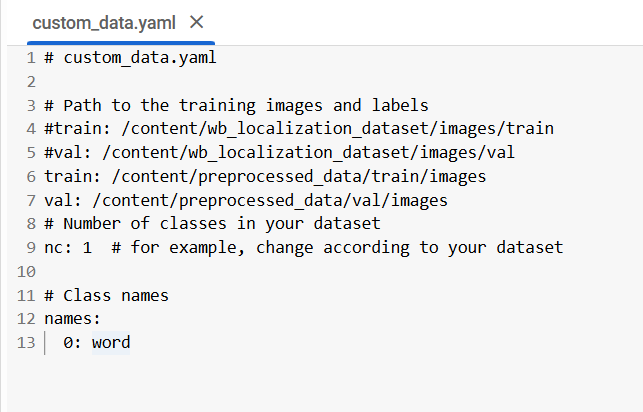

In [ ]:
!python train.py --epochs 60 --batch-size 2 --data /content/yolov5/data/custom_data.yaml --weights /content/yolov5/yolov5s.pt  --img 416

2024-05-22 17:01:26.793177: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-22 17:01:26.793276: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-22 17:01:26.795906: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=/content/yolov5/yolov5s.pt, cfg=, data=/content/yolov5/data/custom_data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=60, batch_size=2, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=,